# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [3]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

### Importing Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path ="/content/drive/MyDrive/GL/Ensemble Technique/EasyVisaProject/EasyVisa.csv"
visa = pd.read_csv(path)

In [6]:
# copying the dartaframe
df=visa.copy()

## Data Overview



In [7]:
#shape of the data
df.shape
print(f'There are {df.shape[0]} rows, {df.shape[1]} columns in the data')

There are 25480 rows, 12 columns in the data


In [8]:
# Checking columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


#### Observations:
- There are 12 columns.
- 9 columns are of object type.
- 2 integer type.
- 1 float type.

In [9]:
# Let's look at some sample data
df.sample(n=10, random_state=1)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
17639,EZYV17640,Asia,Bachelor's,Y,N,567,1992,Midwest,26842.9100,Year,Y,Certified
23951,EZYV23952,Oceania,Bachelor's,N,N,619,1938,Midwest,66419.9800,Year,Y,Certified
8625,EZYV8626,Asia,Master's,N,N,2635,2005,South,887.2921,Hour,Y,Certified
20206,EZYV20207,Asia,Bachelor's,Y,Y,3184,1986,Northeast,49435.8000,Year,Y,Certified
7471,EZYV7472,Europe,Bachelor's,Y,N,4681,1928,West,49865.1900,Year,Y,Denied
3433,EZYV3434,Asia,Bachelor's,Y,N,222,1989,South,813.7261,Hour,Y,Certified
24440,EZYV24441,Europe,High School,N,Y,3278,1994,South,204948.3900,Year,Y,Denied
12104,EZYV12105,Asia,Master's,Y,N,1359,1997,West,202237.0400,Year,N,Certified
15656,EZYV15657,Asia,Bachelor's,N,N,2081,2003,West,111713.0200,Year,Y,Denied
23110,EZYV23111,North America,Bachelor's,Y,N,854,1998,Northeast,444.8257,Hour,Y,Denied


####  Observations:
- From the above sample we dont see any missing values. Let us investigate further for missing values.

- case_id looks like unique id for each case.

- yr_of_establishment is integer type here. But it is year when company is established. We might need to convert this to datetime data,if we need this column for our analysis.

- prevailing_wage is float type. 

- no_of employees is integer type. It tells how many employees does company has.

- Rest of all the columns look like categorical type.

In [10]:
# Checking for missing values
df.isnull().any()

case_id                  False
continent                False
education_of_employee    False
has_job_experience       False
requires_job_training    False
no_of_employees          False
yr_of_estab              False
region_of_employment     False
prevailing_wage          False
unit_of_wage             False
full_time_position       False
case_status              False
dtype: bool

#### Observations:
- It looks like there are no missing values.

In [11]:
# checking duplicate values in the data
df.duplicated().value_counts()

False    25480
dtype: int64

#### Observations:
There is no duplicated rows.

## Exploratory Data Analysis (EDA)

In [12]:
# summary of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


#### Observations:
- no_of_employees column has negative values, assuming this as data entry mistake, let us take abolute values to fix it.

In [13]:
#checking how many rows have negative values for no_of_employees
df[df['no_of_employees'] <0].shape[0]

33

There are 33 rows with no_of_employees being negative

In [14]:
# Fixing negative values in number of employees with absolute values
df['no_of_employees']=abs(df['no_of_employees'])

In [15]:
# Let us check after fixing
df[df['no_of_employees'] <0].shape[0]

0

In [16]:
# Let us check summary again after processing no_of_employees.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


#### Observations:
- There are 2109 employees on average. Minimum number of employees is 11, maximum is 602069. This column looks like right skewed.

- yr_of_establishment represents temporal data, oldest company is established in 1800, Newest company established in 2016.

- Average prevailing wage is 70308\$. Minimum is 2.13\$ maximum is 319210\$. This looks vary right skewed. It might be because of different types of unit of wage.



In [17]:
# Let us check unique case_ids
df['case_id'].value_counts()

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64

#### Observations
- case- id is unique for each case. It is not repeated for any case. Let us drop case id from our dataset.

In [18]:
#dropping case_id column
df=df.drop('case_id',axis=1)

In [19]:
# summary statistics of non numeric data
df.describe(include="object").T

,count,unique,top,freq
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


In [20]:
# Making a list of all catrgorical variables
cat_col = list(df.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(f'--- {column} ---')
    print(df[column].value_counts())
    print("-" * 50)

--- continent ---
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
--- education_of_employee ---
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
--- has_job_experience ---
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
--- requires_job_training ---
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
--- region_of_employment ---
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
--------------------------------------------------
--- unit_of_wage ---
Year     22962
Hour      2157
Week      

#### Observations:
- continent has 6 unique values.Most of the cases are from Asia,followed by Europe.

- education of employee has 4 unique values, Bachelor's, Masert's,High School,Doctorate.Bachelor's is the most common one.

- has_job_experience column has 2 unique values.Y-Yes, N-No. Most of the employees have job experience.

- requires_job training also has 2 unique values,Y-Yes,N-No. Most of the employees dont need jaob training.

- region_of employement has 5 unique values. Northeast is the most frequent employement region followed by South.

- unit_of wage has 4 unique values, Year,Hout,week,Month. Most of the data has Yealry wage unit.

- full_time_position has 2 unique values,Y-Yes,N-No. Most of the employees are full_time.

- case_status has 2 unique values, Certified,Denied. Most of the cases are certified.

In [21]:
# Let us convert object columns to categorical
for col in cat_col:
  df[col]=df[col].astype('category')

### Univariate Analysis

In [22]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [23]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Continent

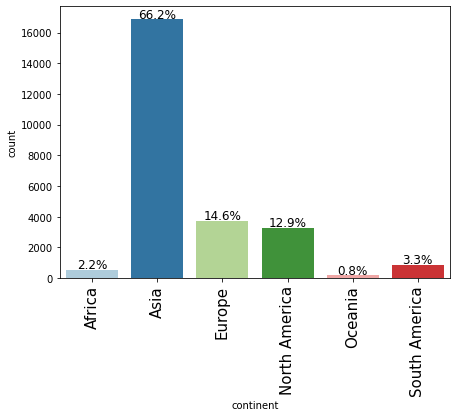

In [24]:
#labeled barplot for continents
labeled_barplot(df,'continent', perc=True) 

#### Observations:
- The data has records from 6 continents.
- Asia has most number of applicants i.e about 66% of the total applicants.
- Europe is second most ,consisting of about 15% of the applicants.
- Oceania has the least number of applicants.


#### Education_of_employee

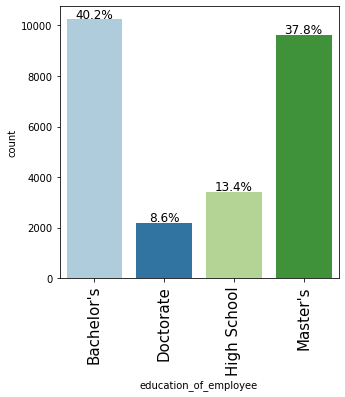

In [25]:
#labeled barplot for education of employees
labeled_barplot(df,'education_of_employee', perc=True) 

#### Observations:
- Out of all the applicants, about 40% of them are having Bachelor's degree.
- About 38% of them are having Master's degree.
- About 13% are of high school graduates.
- Aboutr 9% are having Doctorate degree.



#### has_job_experience

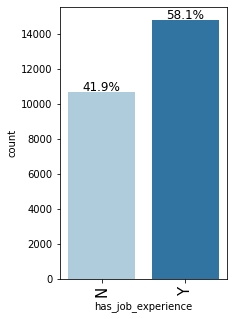

In [26]:
#labeled barplot for has_job_experience
labeled_barplot(df,'has_job_experience', perc=True) 

#### Observations:
- About 58% of visa applicants have job experience.
- About 42% of them are not having job experience.

#### requires_job_training

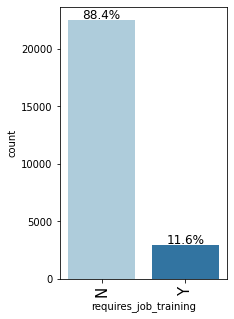

In [27]:
#labeled barplot requires_job_training
labeled_barplot(df,'requires_job_training', perc=True) 

#### Observations:
- About 88% of applicants do not require job training.
- Only about 12% of them need job training.

#### unit_of_wage

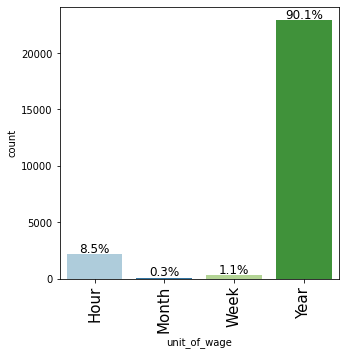

In [28]:
#labeled barplot for continents
labeled_barplot(df,'unit_of_wage', perc=True) 

#### Observations:
- About 90% of the records have unit of wage as Year.
- About 9% are Hourly.
-About 1% have week as wage unit.
- About 0.3% have Month wage unit.

#### full_time_position

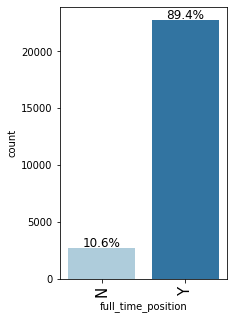

In [29]:
#labeled barplot for full_time position
labeled_barplot(df,'full_time_position', perc=True) 

#### Observations:
- About 89% of the records are for full-time position.
-About 11% are for part-time position.

#### case_status

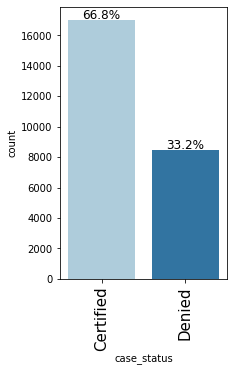

In [30]:
#labeled barplot for case status
labeled_barplot(df,'case_status', perc=True) 

#### Observations:
- About 67% of the cases are Certified.
- About 33% of the cases are Denied.

#### no_of_employees

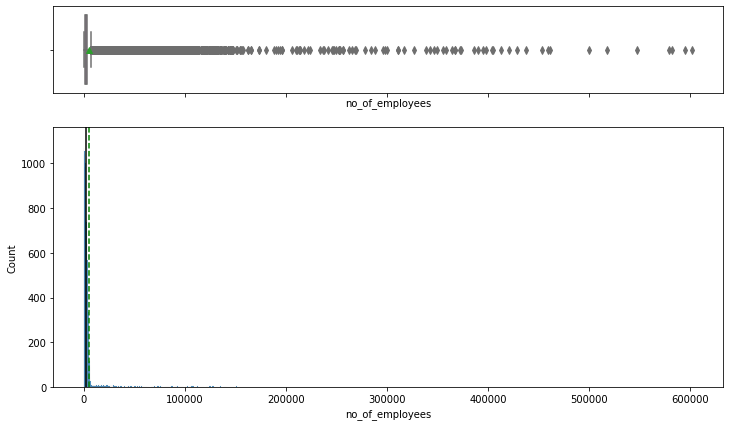

In [31]:
# Histogram boxplot for no_of_employees
histogram_boxplot(df, "no_of_employees")

#### Observations:
- no_of_employees column looks heavily right skewed.
- There are lots of outliers to the right.
- It looks like there are companies with more than 600000 employees.
- Minimum number of employees is 11.
- Mean employees is around 2000.

#### Prevailing wage

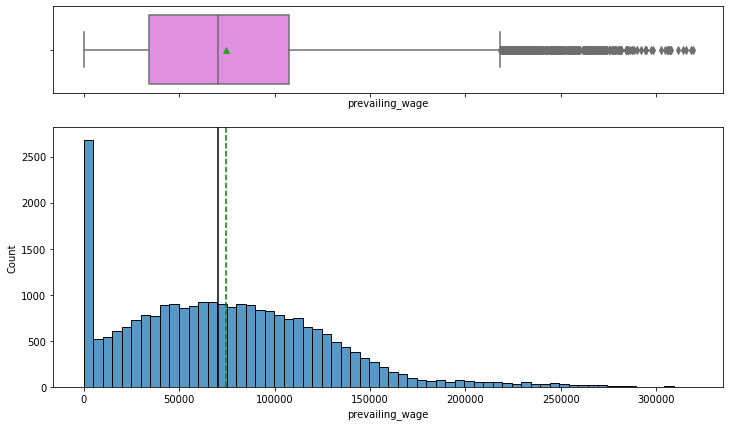

In [32]:
# histogram boxplot for prevailing wage
histogram_boxplot(df, "prevailing_wage")

#### Observations:
- Mean prevailing_wage is around 74455\$
- Median prevailing wage is around 70308\$
- Prevailing wage has lots of outliers to the right.
- Also it is right skewed.
- There are different units of wage.That might be causing outliers in the prevailing wage.


### Bivariate analysis

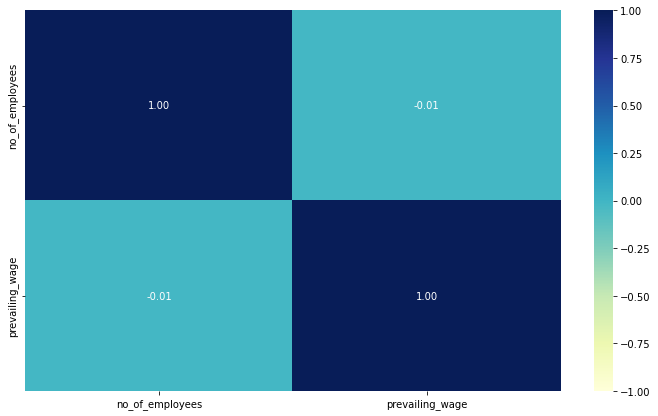

In [33]:
# Let us look at heat map for numeric columns
cols_list = df.select_dtypes(include=np.number).columns.tolist()
cols_list.remove("yr_of_estab")

plt.figure(figsize=(12, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="YlGnBu")
plt.show()

#### Observations:
- None of the numeric fetures are highly correlated. 

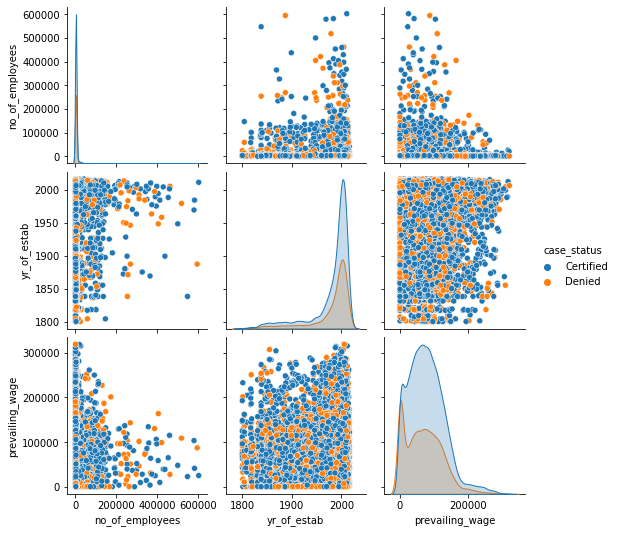

In [34]:
sns.pairplot(data=df, hue="case_status")
plt.show()


#### Observations:
- Both the certified and denies cases have overlapping number of employees and prevailing wage. Let us explore them further.

In [35]:

### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [36]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Continent v/s case status

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


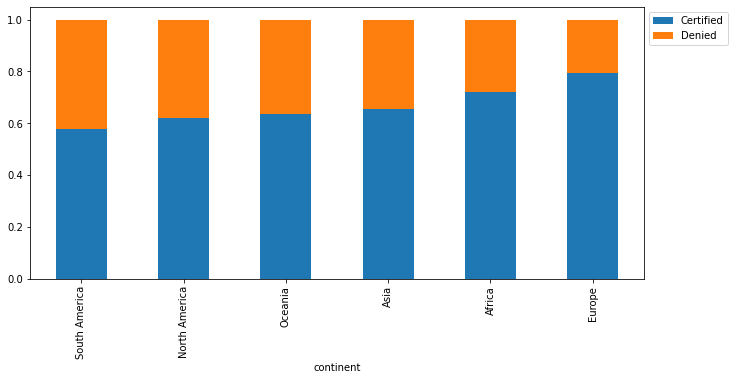

In [37]:
# stacked barplot for continent with respect to case status
stacked_barplot(df, "continent", "case_status")

#### Observations:
- Out of all 25480 applications, 17018 are certified and 8462 are denied.
- Asia has more applicants followed by Europe.
- Europe has more percentage of certified cases,followed by Africa.
- South America has more percentage of denied cases amongst all continents.


#### Those with higher education may want to travel abroad for a well-paid job. Let us see if education play a role in Visa certification.

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


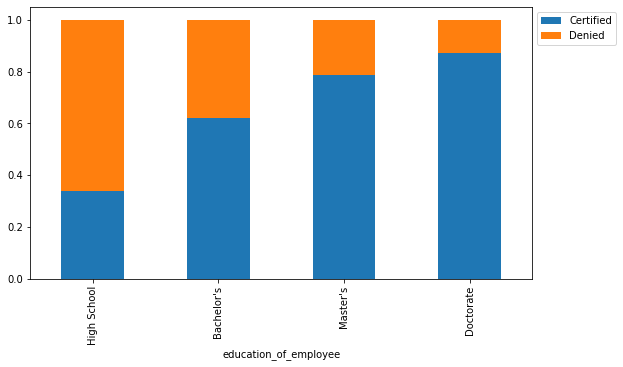

In [38]:
# stacked barplot for education of employee with respect to case status
stacked_barplot(df, "education_of_employee", "case_status")

#### Observations:
- Most of the applicants are having Bachelor's degree,followed by Master's degree.
- Less number of applicants are from high school graduates.
- Doctorate applicants are more likely to be certified, followed by Master's degree applicants.
-  High school graduate applications are more likely to be denied.
- As level of education increases, it is more likely to be certified.


#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let us see how work experience influence visa status

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


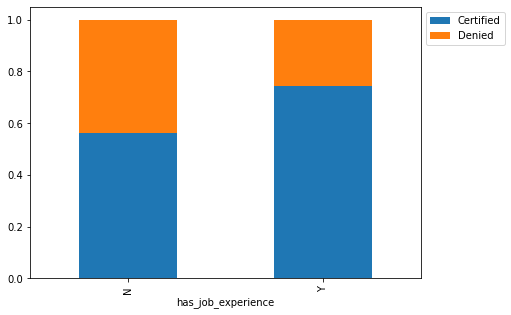

In [39]:
# stacked barplot for has_job_experience with respect to case status
stacked_barplot(df, "has_job_experience", "case_status")

#### Observations:
- Most of the applicants have job experience.
- Applications with job experience is more likely to be Certified than applications with no experience.


#### Let us see if number of employees in a company affect visa status

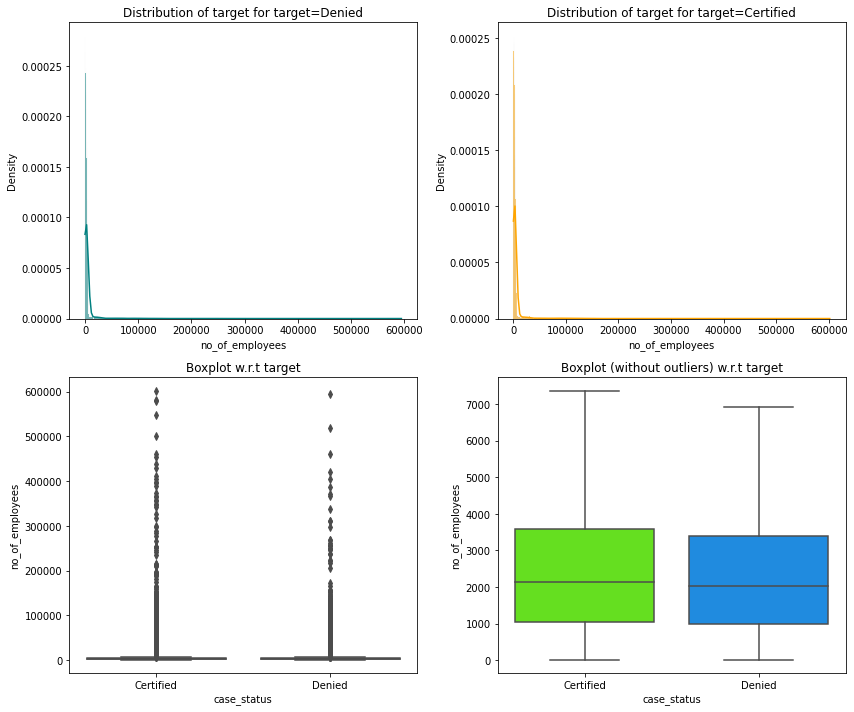

In [40]:
# Distribution of no_of_employees with respect to case_status
distribution_plot_wrt_target(df, 'no_of_employees', 'case_status')

#### Observations:
- Distribution of no_of_employees for both certified and denied cases look almost same.

- Both are heavily right skewed and have outliers.

- If we ignore the outliers, Certifeid cases have slightly more number of employees compared to denied cases.

- It looks like number of employees in a company has little affect visa status. 

### Let us see if yr_of_estab affects case_status

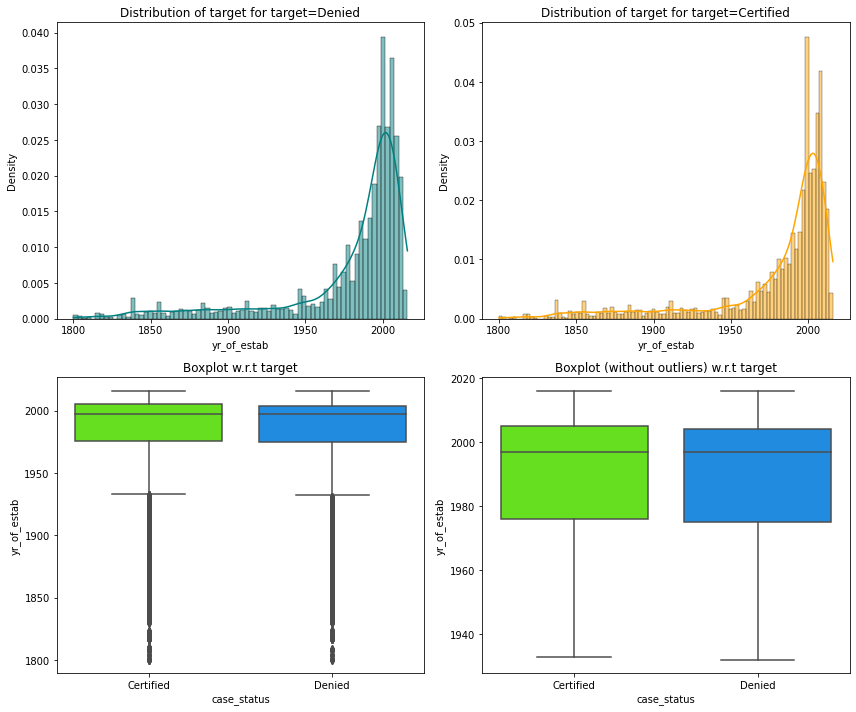

In [41]:
#distribution of yr_of_estab with respect to case status
distribution_plot_wrt_target(df, 'yr_of_estab', 'case_status')

#### Observations:
- Both certified and denied distribution look same for yr_of_estb.
- yr_of establishment is left skewed.
- It also has outliers to the left.
- Also in general  a company's year of establishment should not affect visa status. Every company which follows rules and regulations by the Office of Foreign Labor Certification (OFLC) have equal chance.
- So yr_of_estab should not affect visa status.

 **Yr_of_establishment is not an important feture in deciding visa approval or denial. Any company that follows rules and regulations can apply and have equal chance. So we can drop yr_of_establishment column.**

In [42]:
#dropping yr_of_estab column
df=df.drop('yr_of_estab',axis=1)

#### Let us look at visa status across different regions

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


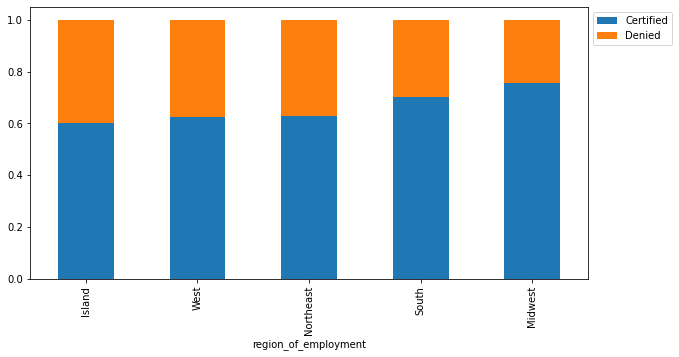

In [43]:
# stacked barplot for region_of_employment with respect to case status
stacked_barplot(df, "region_of_employment", "case_status")

#### Observations:
- Northeast is most desired by employees, followed by South region.
- Least number of applications are for Island region. 
- Midwest region's applications are more likely to be certified,about 76% of applications in the midwest region are certified. 
- About 63% of northeast and 62% of West regions applications are certified.

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let us see how does the visa status change with the prevailing wage

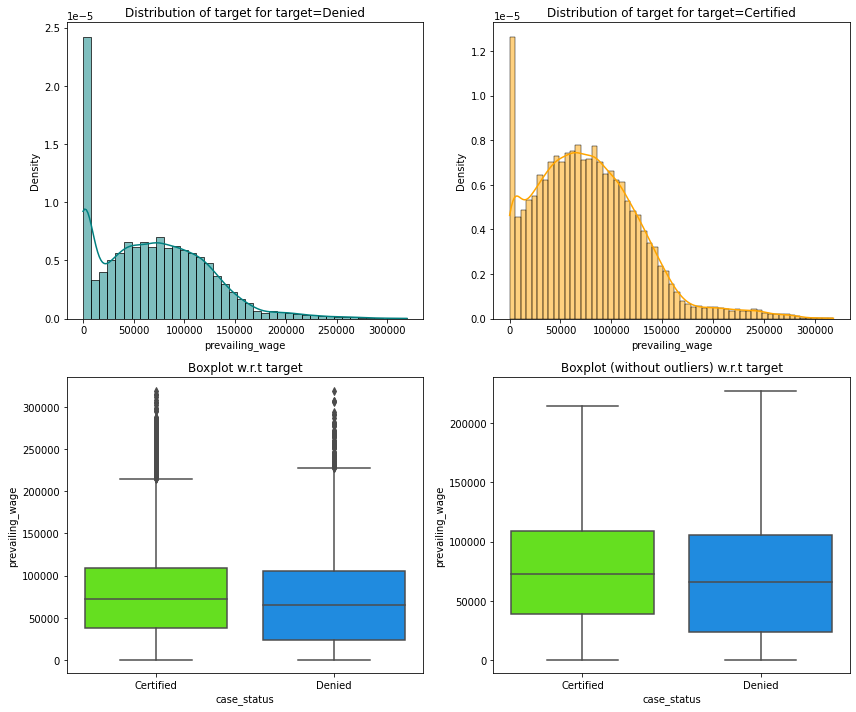

In [44]:
# distribution of prevailing wage w.r.t case_status
distribution_plot_wrt_target(df, 'prevailing_wage', 'case_status')

#### Observations:
- There is a wide range of prevailing wage for both certified and denied cases.
- Prevailing wage is not normally distributed for both certified and denied cases. It is right skewed for both cases.
- Median prevailing_wage of denied cases are little lower than median prevailling wage of certified cases.
- IQR of denied cases are little wider than certified cases.
- We can say that prevailing wage is not entirely different for both certified and denied cases.

#### Checking if the prevailing wage is similar across all the regions of the US

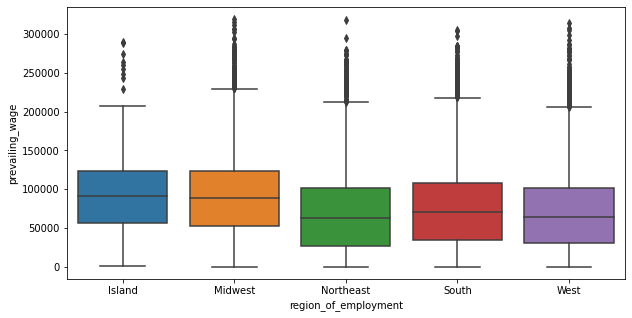

In [45]:
#boxplot for prevailing wage across region of employment
plt.figure(figsize=(10, 5))
sns.boxplot(data=df,y='prevailing_wage',x='region_of_employment')
plt.show()

#### Observations:
- prevailing_wage is different for different region.
- Island and Midwest regions have more median prevailing wage.
- Northeast has lower median prevailing wage compared to other regions.
- All the regions have large outliers to the upper end indicates some prevailing wage is very high in those regions.


#### In the United States, employees are paid at different intervals. Let us see which wage unit is most likely to be certified for a visa.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


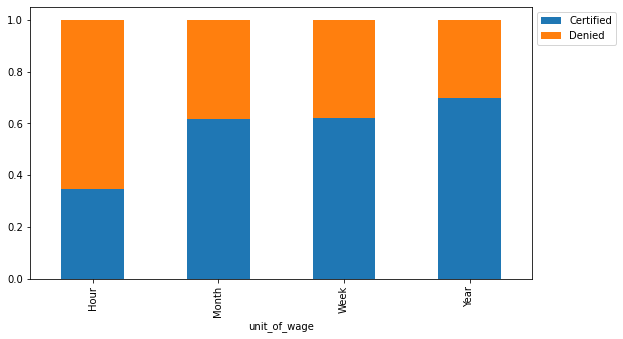

In [46]:
# stacked barplot for unit_of_wage with respect to case status
stacked_barplot(df, "unit_of_wage", "case_status")

#### Observations:
- The data has more number of yearly unit of wage than hourly,weekly and monthly.
- Applications with yearly wage unit is most likely to be certified about (70%)
- About 62% of applications with Weekly as well as monthly wage units are likely to be certified.
- Hourly unit of wage is most likely to be denied.

#### There are different types of positions in a company, full-time, part-time etc. Let us see how being full-time or not  affects visas to be certified 



case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


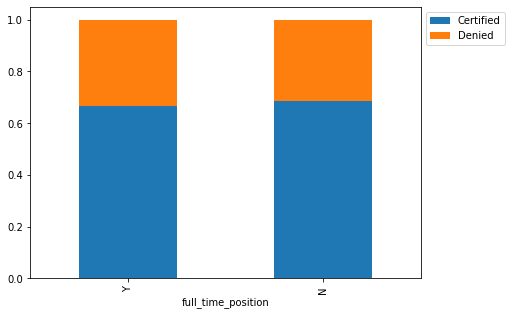

In [47]:
# stacked barplot for full_time_position with respect to case status
stacked_barplot(df, "full_time_position", "case_status")

#### Observations:
- There are more number of full-time positions than part-time positions in our data.
- About 67%-68% of both full-time and part-time employees visa applications are certified.
- It looks like being full-time or part-time does not affect visas to be certified.
  

### Outlier Check

- Let's check for outliers in the data.

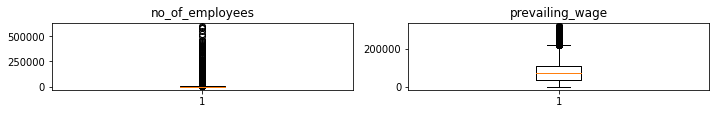

In [48]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(df[variable])
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations
- There are outliers in both no_of_employees and prevailing_wage column.

- Some MNCs have very large number of employees. Outliers look natural datapoints of population.

- Prevailing wage also looks natural as some regions have large prevailng wage compared to others and prevailing wage is dependent unit_of_wage.

- We do not have sufficent data to normalise prevailing wage as unit of_wage differs and we do not have information about number of working hous/days with us.

- Let us not treat outliers.

## Summary of EDA

### Data Description:
- There are 25480 rows, 12 columns in the data
- 9 columns are of object type.
- 2 integer type.
- 1 float type.

- case_id looks like unique id for each case.

- yr_of_establishment is integer type here. But it is year when company is established.

- prevailing_wage is float type. 

- no_of employees is integer type. It tells how many employees does company has.

- Rest of all the columns look like categorical type.

- There are no missing values.

- There are no duplicated rows.


### Data Cleaning:
- case- id is unique for each case. It is not repeated for any case. Let us drop case id from our dataset.
-  no_of_employees column has negative values, assuming this as data entry mistake, we took absolute values of that to fix.
- As yr_of_estab is not important feature in visa approval or denial as we mentioned in EDA, we dropped yr_of_estab
- We converted all object type columns to categorical as we mentioned in our EDA.

### Observations from the EDA:

- `continent` : There are 6 continents from which visa applications received.Asia has more number of applications and Oceania has least number of applications.

- `education_of_employee`: There are 4 types. Highschool, Bachelor's, Master's and Doctorate.40% of the applicants have Bachelor's degree and about 38% have Master's degree.

- `has_job_experience` : About 58% of the applicants have job_experience.

- `requires_job_training`: Most of the(about 88%) applicants do not need job training.

- `no_of_employees` : no_of_employees is heavily right skewed and lots of outliers. Minimum number of employees is 11. Maximum is more than 60000.

- `prevailing_wage`: Prevailing wage is right skewed and has outliers. There are different units for prevailing_wage.May be that is causing it to have have outliers. Median prevailing wage is around 70308\$

- `unit_of_wage`: There are 4 different types of wage units, Hourly, Weekly, Monthly and Yearly.Most of the applicants fall under yearly wage unit.

- `full_time_positions`: About 89% of applicantions are for full time positions.

- `case_status` : Target variable case_status has 2 classes. 'Certified' and 'Denied'. About 67% 0f the cases are certified.

- `continent and case_status` : 
 - Most of the applications are from Asia(about 43%)
European applications have higher percentage of certified cases. South american appilactions have more percentage of denial cases.

- `education_of_employee and case_status`: 
 - There are 4 levels of education found in our data. Highschool, Bachelors's, Master's, Doctorate.
Applications with Highscool education are more likely to be denied.
Applicants with Doctorate degree are most likely to be certified.
Most of the applicants have Bachelor's degree,followed by Master's degree.
So it looks like education does play role in case_status.

- `has_job_experience and case_status`:
 -  Most of the applicants have job experience. Applications with job experience are more likely to be certified.

- `no_of_employees and case_status`: 
 - Distribution of number of employees in both certified and denied cases look almost similar. Both are heavily right skewed and outliers. If we ignore the outliers, Certifeid cases have slightly more number of employees compared to denied cases.

- `region_of_employment and case_status`: 
 - There are 5 different regions of employment. Most of the applications are for northeast followed by south.
Midwest applications are more likely to be certified, followed by South regions.
Island region is least desired by applicants.

- `prevailing_wage and case status`: 
 - Prevailing wage is not normally distributed for both certified and denied cases. It is right skewed for both cases.
Median prevailing_wage of denied cases are little lower than median prevailling wage of certified cases.We can say that prevailing wage is not entirely different for both certified and denied cases.

- `prevailing_wage and region of employment`:
 - prevailing_wage is different for different region.Island and Midwest regions have more median prevailing wage.Northeast has lower median prevailing wage compared to other regions.All the regions have large outliers to the right.

- `unit_of_wage and case_status`: 
 - There are 4 units of wage i.e. year, month,week,hour. Applications with yearly wage unit is most likely to be certified (about 70%) About 62% of applications with Weekly as well as monthly wage units are likely to be certified.Hourly unit of wage is most likely to be denied.

- `full_time_position and case status`:
 - About 67% to 68% of both full-time and part-time employees visa applications are certified.It looks like being full-time or part-time does not affect visas to be certified much.









### Data Preparation for modeling

- We want to predict which visa will be certified and which will be denied.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

#### Let us encode target variable case_status

In [49]:
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [50]:
# defining the dependent and independent variables
X = df.drop(["case_status"], axis=1)
y = df["case_status"]

In [51]:
# Let us look at independent variables
X.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y


In [52]:
# Let us look at dependent variable
y.head()

0    0
1    1
2    0
3    0
4    1
Name: case_status, dtype: category
Categories (2, int64): [1, 0]

In [53]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,no_of_employees,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513,592.2029,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,2412,83425.6500,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1
2,44444,122996.8600,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
3,98,83434.0300,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,1082,149907.3900,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1


In [54]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

In [55]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("\nPercentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("\nPercentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 20)
Shape of test set :  (7644, 20)

Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64

Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


About 67% of cases belong to `certified class`(1) and about 33% of cases belong to `denied class`(0) 

## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

#### let's create functions to calculate different metrics and confusion matrix

In [56]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [57]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree Model

In [58]:
dtmodel1 = DecisionTreeClassifier(random_state=1)
dtmodel1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

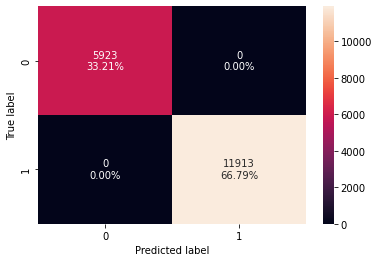

In [59]:
# confusion matrix on training set
confusion_matrix_sklearn(dtmodel1, X_train, y_train)

In [60]:
# Model performance on training data
decision_tree_perf_train = model_performance_classification_sklearn(
    dtmodel1, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Observations:
- Decision tree model is overfitting on training set. All the metrics mentioned above are 1. 

#### Checking model performance on test set

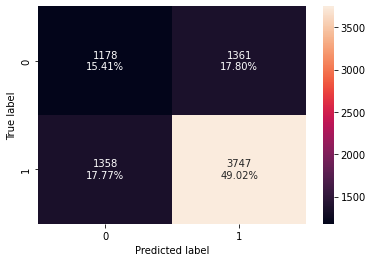

In [61]:
confusion_matrix_sklearn(dtmodel1, X_test, y_test)

In [62]:
decision_tree_perf_test = model_performance_classification_sklearn(
    dtmodel1, X_test, y_test
) 
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.644296,0.733986,0.733555,0.733771


#### Observations:
- Model performance on testing set is reduced compared to training set as training set is overfitting the model.
- F1-score is about 0.73
- Accuracy of the model is 0.64
- Model is giving almost similar precision and recall on testing set.


## Random Forest

In [63]:
#building Random forest classifier
rf_weighted=RandomForestClassifier(random_state=1,class_weight="balanced")
rf_weighted.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

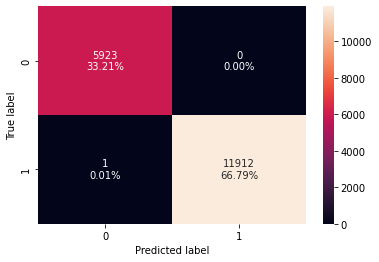

In [64]:
confusion_matrix_sklearn(rf_weighted, X_train, y_train)

In [65]:
rf_weighted_model_train_perf = model_performance_classification_sklearn(rf_weighted,X_train,y_train)
rf_weighted_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999944,0.999916,1.0,0.999958


#### Observation:
- Random forest model is overfitting on training set.

#### Checking model performance on test set

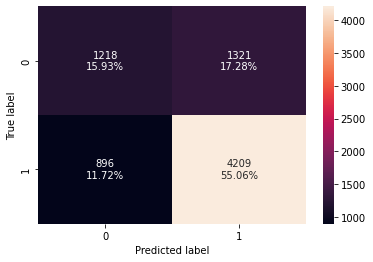

In [66]:
confusion_matrix_sklearn(rf_weighted, X_test, y_test)

In [67]:
rf_weighted_model_test_perf = model_performance_classification_sklearn(rf_weighted,X_test,y_test)
rf_weighted_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.709969,0.824486,0.761121,0.791537


#### Observations:
- Rondom forest model metrics reduced on testing set as compared to training set.
- F1 score on testing set is 0.81.


##  Bagging Classifier Model

In [68]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(random_state=1)

#### Checking model performance on traing data

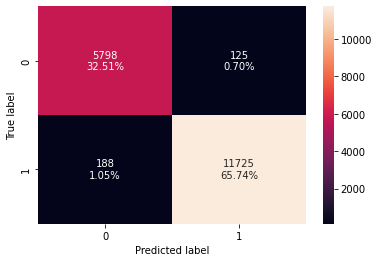

In [69]:
#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [70]:
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.982451,0.984219,0.989451,0.986828


#### Observations:
- Bagging classifier model F1-score is 0.98
-High Accuracy, Recall and precision on train data.
- Looks  Bagging classifier is overfitting on training data

#### Checking model performance on test data

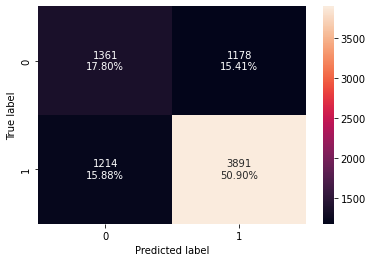

In [71]:
#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [72]:
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.687075,0.762194,0.767607,0.764891


#### Observations:
- F1-score is about 0.76 which is low compared to training data.
- Accuracy is dropped to 0.69
- Recall and precision are almost same


## Boosting Models

### AdaBoost Classifier

In [73]:
ab_classifier =AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

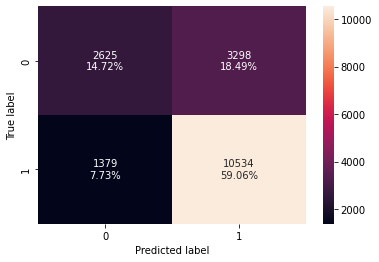

In [74]:
confusion_matrix_sklearn(ab_classifier,X_train,y_train)

In [75]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,X_train,y_train)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.737778,0.884244,0.761567,0.818334


#### Observations:
- AdaBoost classifier is not overfitting on training data.
- F1-score is about 0.82

#### Checking model performance on test set

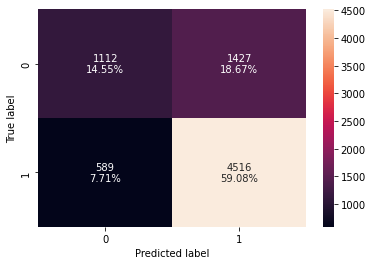

In [76]:
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [77]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,X_test,y_test)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.736264,0.884623,0.759886,0.817524


#### Observations:
- Model is giving generalised score on both training and testing data.
- F1-score is about 0.82


### Gradient Boosting Classifier

In [78]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

#### Checking model performance on training set

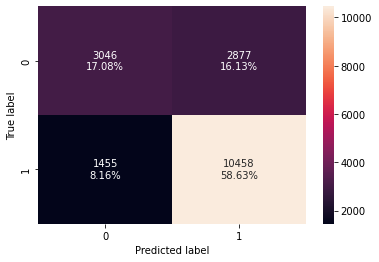

In [79]:
confusion_matrix_sklearn(gb_classifier,X_train,y_train)

In [80]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier,X_train,y_train)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.75712,0.877865,0.784252,0.828422


#### Observations:
- F1-score is about 0.83
- Model is not overfitting on training data.

#### Checking model performance on test set

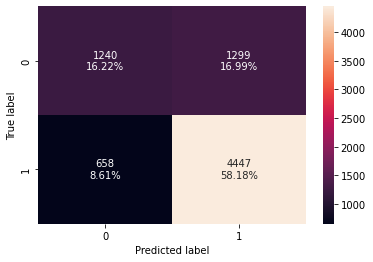

In [81]:
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [82]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier,X_test,y_test)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743982,0.871107,0.77393,0.819648


#### Observations:
- F1- score on testing data is 0.82.
- Model is giving generailsed result on both training and testing data.

### XGBoost Classifier

In [83]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

XGBClassifier(eval_metric='logloss', random_state=1)

#### Checking model performance on training set

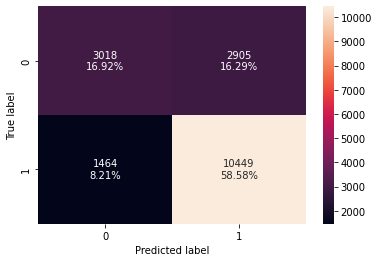

In [84]:
confusion_matrix_sklearn(xgb_classifier,X_train,y_train)

In [85]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.755046,0.877109,0.782462,0.827087


#### Observations:
- XGboost model is not overfitting on training data.
-F1-score is about 0.83 on training data

#### Checking model performance on test set

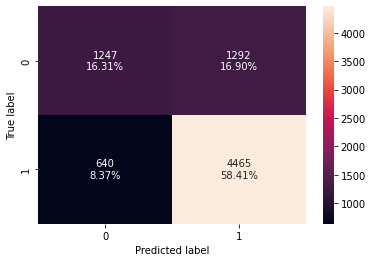

In [86]:
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [87]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.747253,0.874633,0.775578,0.822132


#### Observations:
- Model is giving generalised result on both training and testing data.
- F- score is 0.82 on testing data.

## Let us check if tuning all the models with hyperparameters improve model performances

### Hyperparameter Tuning - Decision Tree

In [88]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 20, 3),
    "min_samples_leaf": [3, 5, 7, 9],
    "max_leaf_nodes": [2, 5, 6, 7],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

#### Checking tuned decision tree performance on training data

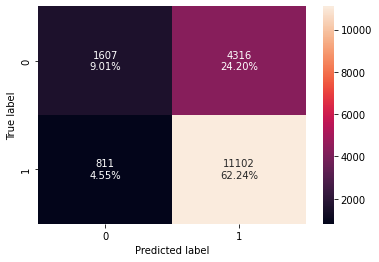

In [89]:
#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [90]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


#### Observations:
- Tuned decsion tree is not overfitting on training data as compared to original descion tree.
- F1- score is about 0.81
- Tuned model is having high recall compared to precision.


#### Checking model performance on test set

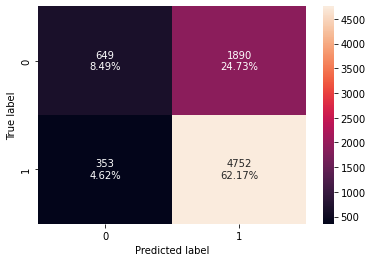

In [91]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [92]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


#### Observations:
- Tuned Decision is performing better than default Decision Tree.
- Tuned Decision tree performance on test set is similar to performance on tuned Decision tree training set.
- Test F1-score is about 0.81.
- Model is giving generalised results on both training and testing data.

### Hyperparameter Tuning - Random Forest

In [93]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 21, 5)) + [None],
    "max_features": ["sqrt", "log2",None],
    "min_samples_split": [5, 7,10],
    "n_estimators": np.arange(15, 31, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=30, oob_score=True, random_state=1)

#### Checking model performance on training set

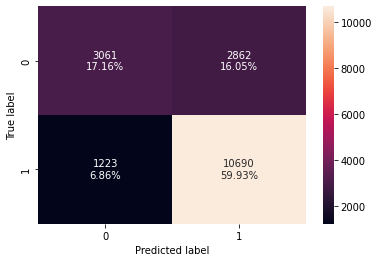

In [94]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [95]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned,X_train,y_train)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.770969,0.897339,0.788813,0.839584


#### Observations:
- Tuned random forest model is not overfitting on traing data as compared to untuned random forest model.
- F1- score is about 0.84

#### Checking model performance on test set

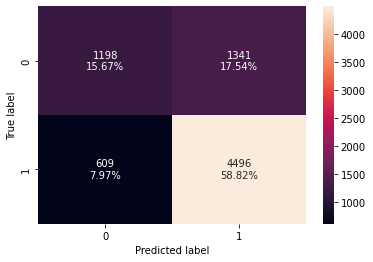

In [96]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [97]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned,X_test,y_test)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744898,0.880705,0.770259,0.821788


#### Observations:
- This model is well generalizing on training and testing data.
- F1-score for testing set is 0.82

###  Hyperparameter Tuning - Bagging Classifier

In [98]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7,0.8,0.9],
    "max_features": [0.6,0.7,0.8],
    "n_estimators": np.arange(100, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.6, max_samples=0.8, n_estimators=110,
                  random_state=1)

#### Checking model performance on training set

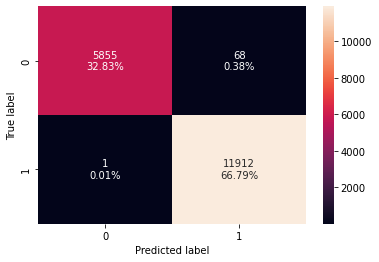

In [99]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [100]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.996131,0.999916,0.994324,0.997112


#### Observations:
- Tuned bagging classifier F1-score is 0.997.
- Tuned model shows high Accuracy, Recall and Precision on training set.
- Model is still overfitting on training set after tuning.

#### Checking model performance on test set

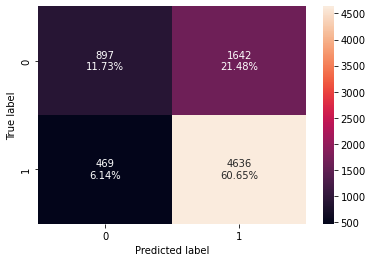

In [101]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [102]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.723836,0.908129,0.738452,0.814548


#### Observations:
- F1-score is 0.81 on testing set.
- F1 Score increased on test data compared to default Bagging classifier's F1-score on test data.
- Model is giving good recall i.e out of all visas that are certified, model is predicting about 90% of them correctly.
- Out of all the visas to be denied,model is predicting about 74% of them correctly.

### Hyperparameter Tuning - AdaBoost Classifier

In [103]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=3, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 111, 10),
    "learning_rate": np.arange(0.1, 0.8, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train,y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

#### Checking model performance on training set

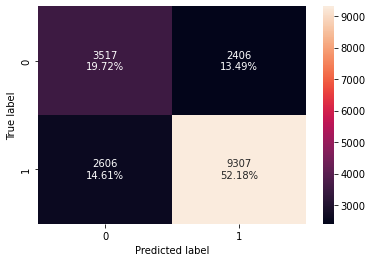

In [104]:
confusion_matrix_sklearn(abc_tuned,X_train,y_train)

In [105]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned,X_train,y_train)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.718995,0.781247,0.794587,0.787861


#### Observations:
- Hyperparameter tuning on Adaboost classifier is not improving the performance on training data compared to default AdaBoost Classifier.
- F1- score reduced compared to Adaboost Classifier with default parameters.

#### Checking model performance on test set

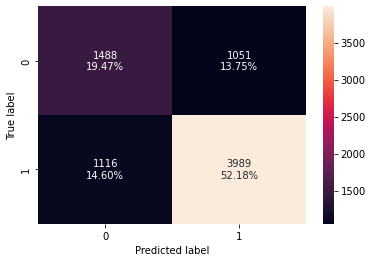

In [106]:
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

In [107]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned,X_test,y_test)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.71651,0.781391,0.791468,0.786397


#### Observations:
- F1 score on test data is 0.78
- Model is giving generalised result on both training and testing set.
- F1- score reduced from intial AdaBoost model.
- Adaboost classifiers is performing well on default parameters compared to tuned version.


### Hyperparameter Tuning - Gradient Boosting Classifier

In [108]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample": [0.8,0.9,1],
    "max_features": [0.6,0.7,0.8,0.9],
    "learning_rate": np.arange(0.1, 0.31, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj =GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, random_state=1, subsample=1)

#### Checking model performance on training set

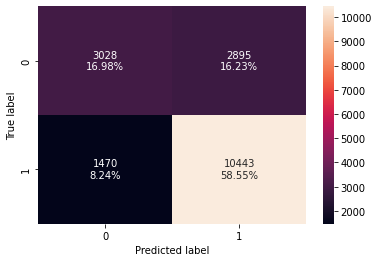

In [109]:
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)

In [110]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.75527,0.876605,0.782951,0.827136


#### Observations:
- Tuned Gradient boost model is not overfitting on training data.
- F1-score is about 0.83

#### Checking model performance on test set

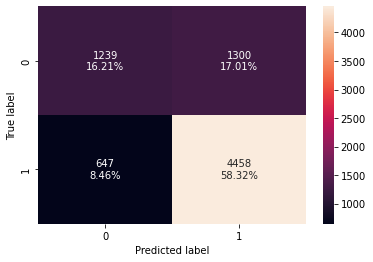

In [111]:
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

In [112]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.74529,0.873262,0.774227,0.820768


#### Observations:
- F1-score is 0.82.
- Model is giving generailsed result on both training and testing data.
- Tuned model is almost similar to initial model.Tuned model is not significantly better than initial gradient boost model.


### Hyperparameter Tuning - XGBoost Classifier

In [113]:
# Choosing the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choosen from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": [0.05, 0.1,0.2],
    "gamma": [3, 5],
    "colsample_bytree": [0.7,0.8, 0.9,1],
    "colsample_bylevel": [0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Running the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Setting the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fitting the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.7, eval_metric='logloss', gamma=5,
              n_estimators=200, random_state=1)

#### Checking model performance on training set

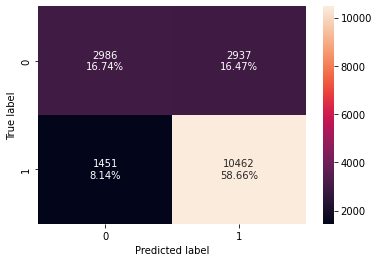

In [114]:
confusion_matrix_sklearn(xgb_tuned,X_train,y_train)

In [115]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.753981,0.8782,0.780805,0.826643


#### Observations:
- tuned XGB model is not overfitting on training data.
- F1-score is about 0.83 on training data.

#### Checking model performance on test set

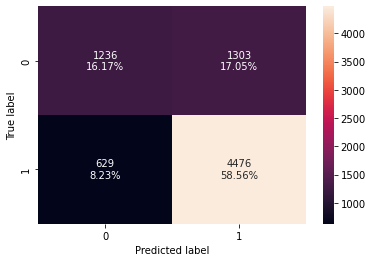

In [116]:
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [117]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.747253,0.876787,0.774528,0.822492


#### Observations:
- Tuned model is almost similar to initial XGB model.
- F1-score is 0.82 on test data

### Observation on hyperparameter tuning different models
- Tuned Decision tree reduced overfitting on training data. It is performing better on testing data.
- Tuned Bagging classifier is still overfitting on training data.
- Tuned random forst model reduced the overfitting on traning data.
- Tuned AdaBoost classifier model performance reduced compared to default AdaBoost classifier.
- Tuned Gradient Boosting is giving similar performance as default Gradient Boosting model.
- XGB model and Tuned XGB model are giving similar F1-score.

## Stacking Classifier Model

In [118]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=30,
                                                       oob_score=True,
                                                       random_state=1))],
                   final_estimator=XGBClassifier(cols

#### Checking model performance on training set

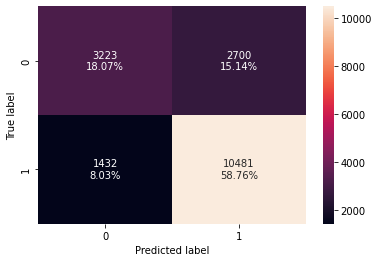

In [119]:
confusion_matrix_sklearn(stacking_classifier,X_train,y_train)

In [120]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.768334,0.879795,0.79516,0.835339


#### Observations:
- stacking classifier is not overfitting.
- F1-score is about 0.84. Highest F1-score so far.

#### Checking model performance on test set

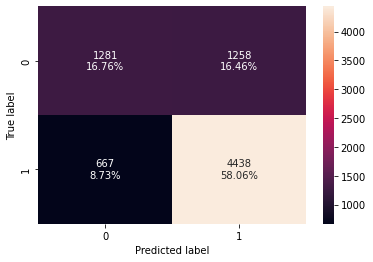

In [121]:
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

In [122]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.748168,0.869344,0.779143,0.821776


#### Observations:
- stacking classifier is giving generalised result.
- F1- score on test set is 0.82

## Let us compare all models

### Comparing training performance of all models

In [123]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_weighted_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.982451,0.996131,0.999944,0.770969,0.737778,0.718995,0.757120,0.755270,0.755046,0.753981,0.768334
Recall,1.0,0.931923,0.984219,0.999916,0.999916,0.897339,0.884244,0.781247,0.877865,0.876605,0.877109,0.878200,0.879795
Precision,1.0,0.720067,0.989451,0.994324,1.000000,0.788813,0.761567,0.794587,0.784252,0.782951,0.782462,0.780805,0.795160
F1,1.0,0.812411,0.986828,0.997112,0.999958,0.839584,0.818334,0.787861,0.828422,0.827136,0.827087,0.826643,0.835339


### Comparing testing performance of all models

---



In [124]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_weighted_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.644296,0.706567,0.687075,0.723836,0.709969,0.744898,0.736264,0.716510,0.743982,0.745290,0.747253,0.747253,0.748168
Recall,0.733986,0.930852,0.762194,0.908129,0.824486,0.880705,0.884623,0.781391,0.871107,0.873262,0.874633,0.876787,0.869344
Precision,0.733555,0.715447,0.767607,0.738452,0.761121,0.770259,0.759886,0.791468,0.773930,0.774227,0.775578,0.774528,0.779143
F1,0.733771,0.809058,0.764891,0.814548,0.791537,0.821788,0.817524,0.786397,0.819648,0.820768,0.822132,0.822492,0.821776


### Observations:
- Decision Tree,Random Forest,Bagging Classifier,Tuned Bagging Classifier models are overfitting on training data.
- Tuned XGBoost classifier,stacking classifier,tuned Random Forest,XGBoost,tuned Gradient Boost classifier,Gradient Boost classifier, Adaboost classifier are giving almost similar F1-score on testing data.
- Comparing F1-score on both training and testing data, we can say that tuned XGBoosting,XGBoosting and Tuned Gradient Boosting are top 3 models.


## important features

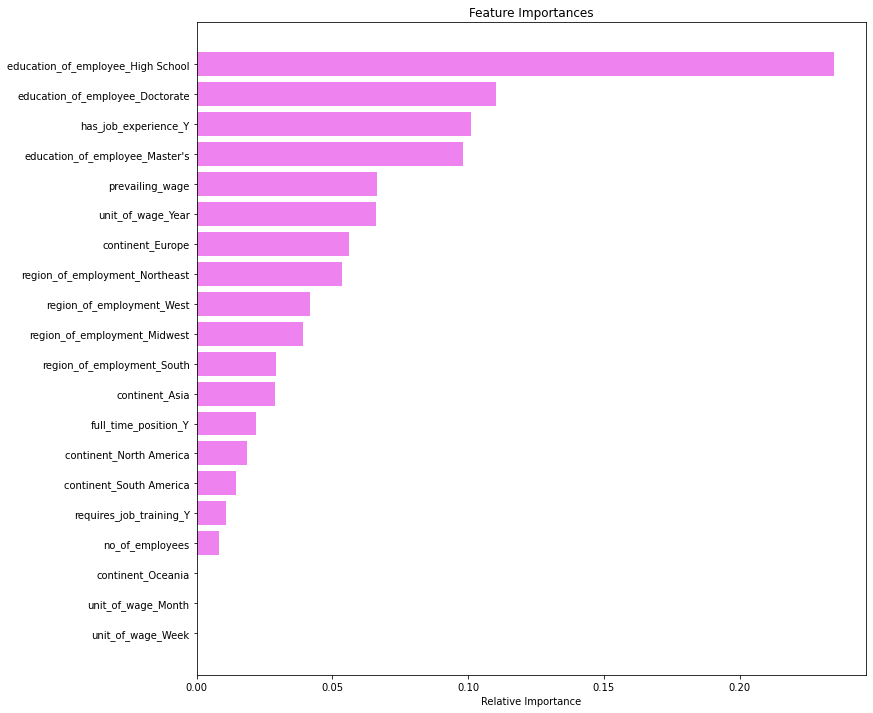

In [125]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
- Education_of_employee_high_school
- Education_of_employee_Doctorate
- has_job_experience_Y
- education_of_employee_Master's
- prevailing_wage 
- unit_of_wage_year 

These are the top 6 features in certifying or denying the H1B visas.



## Conclusions

- We did through analysis on the dataset proveided. 

- From our analysis we can say that apllicants from Europe are more likely to be certified compared to applicants of other continents.

- Higher the level of education more likely to be certified.

- Experienced applicants are more likely to get certified than those applicants without experience.

- no_of_employees in a company is an important feture discovered by our model.

- Midewest and South regions have more certified cases compared to other regions. 

- Median prevailing_wage of denied cases are little lower than median prevailling wage of certified cases. And we can see both certified and denied cases are not having entirely diffrent range of wage.Also prevailing wage is one of the important feture our model is indicating.

- yearly wage unit is more likely to be certified.

- full_time or part time postion are considered equally from our analysis.

- We have built Decision Tree, Random forest, Bagging classifier, AdaBoost classifier, Gradient Boost classifier, XGBoost and stacking models and tuned the models. 

- We found that tuned XGBoosting,XGBoosting and Tuned Gradient Boosting are top 3 models.

- We are considering Tuned XGBoosting as our final model.

- Our model can be used in predicting visas to be certifed and denied.

## Actionable Insights and Recommendations

- We can add title of the position feature and Specialization of study feature to check if the applicant is suitable for the position. 

- We can also add some feature to check if the postion for which applicant is applying needs job_experience or not.

- Every year number of applications is increasing and limited number of visas available. To make the best use of foreign talent and local talent, we can divide the visa processing on different levels.

- First, highest level of education should be given the priority in certifying visas. Some number of visas should be allocated to the highest level of education.

- Those applications who could not make it to certified in first level should move to second level and so on.

- Then experienced applicants can be allocated along with those applicants left from previous level.

- Then based on prevailing_wage along with those left from previous level should be considered.

- Machine learing app can be built to facilitate such different level of visa processing.


